# Inventory, Purchase, Sales Analysis and Optimization

## How to Run This Notebook Locally

1. **Install Python**  
   Make sure you have Python 3.8+ installed. Download from [python.org](https://www.python.org/downloads/).

2. **Install Required Libraries**  
   Open a terminal and run:
   ```
   pip install pandas numpy matplotlib seaborn prophet jupyter
   ```

3. **Download the Data Files**  
   Place the following CSV files in the same folder as the notebook:
   - 2017PurchasePricesDec.csv
   - BegInvFINAL12312016.csv
   - EndInvFINAL12312016.csv
   - InvoicePurchases12312016.csv
   - PurchasesFINAL12312016.csv
   - SalesFINAL12312016.csv

4. **Open the Notebook**  
   In the terminal, navigate to the project folder and run:
   ```
   jupyter notebook
   ```
   Then open `solution.ipynb` in your browser.

5. **Run All Cells**  
   In Jupyter, click "Cell" > "Run All" to execute the notebook.

6. **View Results**  
   Plots and analysis will appear below each code cell.

## Data Precprocessing

### importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

e:\Projects\Slooze\slooze_challenge\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Load CSVs 

In [ ]:

purchase_prices = pd.read_csv('2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('BegInvFINAL12312016.csv')
end_inv = pd.read_csv('EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('InvoicePurchases12312016.csv')
purchases = pd.read_csv('PurchasesFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')

# List of all DataFrames
dfs = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
df_names = ['purchase_prices', 'beg_inv', 'end_inv', 'invoice_purchases', 'purchases', 'sales']



### Top 5 rows of all the datasets

In [5]:
for df  in dfs:
    print(df.head())

   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         
         InventoryId  Store          City  Brand                  Description  \
0  1_HARDERSFIELD_58      1  HARDERSFIELD     58  Gekkeikan Black & Gold Sake 

### Information about all the datasets

In [6]:
for df in dfs:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3 

### Name of all the columns

In [7]:
for df in dfs:
    print(df.columns)

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'startDate'],
      dtype='object')
Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')
Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')
Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'Exc

### Function to print unique values in each column

In [ ]:

def print_unique_values(df, df_name, max_values=20):
    print(f"\n--- Unique Values in {df_name} ---")
    for col in df.columns:
        unique_vals = df[col].unique()
        print(f"\nColumn: '{col}' ({len(unique_vals)} unique values)")
        if len(unique_vals) <= max_values:
            print(unique_vals)
        else:
            print(f"Too many unique values ({len(unique_vals)}). Showing first {max_values}:")
            print(unique_vals[:max_values])

for df,name in zip(dfs,df_names):
    print_unique_values(df,name)



--- Unique Values in purchase_prices ---

Column: 'Brand' (12261 unique values)
Too many unique values (12261). Showing first 20:
[ 58  62  63  72  75  77  79 115 126 168 171 173 175 178 192 211 229 233
 247 254]

Column: 'Description' (11115 unique values)
Too many unique values (11115). Showing first 20:
['Gekkeikan Black & Gold Sake' 'Herradura Silver Tequila'
 'Herradura Reposado Tequila' 'No. 3 London Dry Gin'
 'Three Olives Tomato Vodka' 'Three Olives Espresso Vodka'
 'Three Olives Loopy Vodka' 'Belvedere Vodka' 'Grey Goose Vodka'
 'Three Olives Strawberry' 'Gentleman Jack' 'Hornitos Reposado VAP'
 '1800 Anejo Tequila' "Wild Turkey Russell's RSV" 'Milagro Anejo Tequila'
 'Cold River Gin' 'Sauza Gold VAP' 'Tullamore Dew 12 Yr Old'
 'Gran Patron Platinum Tequil' 'DeKuyper Root Beer Schnapps']

Column: 'Price' (380 unique values)
Too many unique values (380). Showing first 20:
[ 12.99  36.99  38.99  34.99  14.99  27.99  32.99  49.99  22.99  29.99
  35.99  24.99  46.99 199.99  10.99

### Clean all DataFrames in dfs

In [9]:
# Define list of strings to treat as missing
suspect_strings = ['unknown', 'Unknown', 'na', 'NA', 'N/A', '', '?','nan']

# Clean all DataFrames in dfs
for i, df in enumerate(dfs):
    # Replace suspect strings with NaN in object columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].replace(suspect_strings, pd.NA)
    
    # Drop rows with any NaN values
    df_cleaned = df.dropna()
    
    # Update both the list and the corresponding variable name if needed
    dfs[i] = df_cleaned
    globals()[df_names[i]] = df_cleaned  # This updates the named variable



In [10]:
purchase_prices['Volume'].unique()

array(['750', '1000', '1750', '50', '375', '100', '200', '300', '250',
       '1500', '3000', '5000', '4000', '187', '150', '500', '720', '650',
       '330', '18000', '180', '6000', '20', '20000', '162.5', '400',
       '1100', '600', '19500', '560', '3750', '9000'], dtype=object)

In [11]:
for df in dfs:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12256 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12256 non-null  int64  
 1   Description     12256 non-null  object 
 2   Price           12256 non-null  float64
 3   Size            12256 non-null  object 
 4   Volume          12256 non-null  object 
 5   Classification  12256 non-null  int64  
 6   PurchasePrice   12256 non-null  float64
 7   VendorNumber    12256 non-null  int64  
 8   VendorName      12256 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 957.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Bra

### --------------------
### Dataset-specific fixes
### --------------------

In [ ]:


# --- purchase_prices ---
purchase_prices['Volume'] = purchase_prices['Volume'].astype(float)
purchase_prices['PurchasePrice'] = pd.to_numeric(purchase_prices['PurchasePrice'], errors='coerce')
purchase_prices['Price'] = pd.to_numeric(purchase_prices['Price'], errors='coerce')

In [13]:
# --- beg_inv & end_inv ---

beg_inv['startDate'] = pd.to_datetime(beg_inv['startDate'], errors='coerce')
beg_inv['onHand'] = pd.to_numeric(beg_inv['onHand'], errors='coerce')
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'], errors='coerce')
end_inv['onHand'] = pd.to_numeric(end_inv['onHand'], errors='coerce')

In [14]:
end_inv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  223205 non-null  object        
 1   Store        223205 non-null  int64         
 2   City         223205 non-null  object        
 3   Brand        223205 non-null  int64         
 4   Description  223205 non-null  object        
 5   Size         223205 non-null  object        
 6   onHand       223205 non-null  int64         
 7   Price        223205 non-null  float64       
 8   endDate      223205 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 17.0+ MB


In [15]:
beg_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  206529 non-null  object        
 1   Store        206529 non-null  int64         
 2   City         206529 non-null  object        
 3   Brand        206529 non-null  int64         
 4   Description  206529 non-null  object        
 5   Size         206529 non-null  object        
 6   onHand       206529 non-null  int64         
 7   Price        206529 non-null  float64       
 8   startDate    206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.2+ MB


In [16]:
# --- invoice_purchases ---
invoice_purchases['InvoiceDate'] = pd.to_datetime(invoice_purchases['InvoiceDate'], errors='coerce')
invoice_purchases['PODate'] = pd.to_datetime(invoice_purchases['PODate'], errors='coerce')
invoice_purchases['PayDate'] = pd.to_datetime(invoice_purchases['PayDate'], errors='coerce')
invoice_purchases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 93 to 5532
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   VendorNumber  374 non-null    int64         
 1   VendorName    374 non-null    object        
 2   InvoiceDate   374 non-null    datetime64[ns]
 3   PONumber      374 non-null    int64         
 4   PODate        374 non-null    datetime64[ns]
 5   PayDate       374 non-null    datetime64[ns]
 6   Quantity      374 non-null    int64         
 7   Dollars       374 non-null    float64       
 8   Freight       374 non-null    float64       
 9   Approval      374 non-null    object        
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 32.1+ KB


In [17]:
# --- purchases ---
for date_col in ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate']:
    purchases[date_col] = pd.to_datetime(purchases[date_col], errors='coerce')
purchases['Quantity'] = pd.to_numeric(purchases['Quantity'], errors='coerce')
purchases['PurchasePrice'] = pd.to_numeric(purchases['PurchasePrice'], errors='coerce')
purchases['Dollars'] = pd.to_numeric(purchases['Dollars'], errors='coerce')
purchases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2372471 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 307.7+ MB


In [18]:
# --- sales ---
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'], errors='coerce')
sales['SalesQuantity'] = pd.to_numeric(sales['SalesQuantity'], errors='coerce')
sales['SalesPrice'] = pd.to_numeric(sales['SalesPrice'], errors='coerce')
sales['SalesDollars'] = pd.to_numeric(sales['SalesDollars'], errors='coerce')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   InventoryId     1048575 non-null  object        
 1   Store           1048575 non-null  int64         
 2   Brand           1048575 non-null  int64         
 3   Description     1048575 non-null  object        
 4   Size            1048575 non-null  object        
 5   SalesQuantity   1048575 non-null  int64         
 6   SalesDollars    1048575 non-null  float64       
 7   SalesPrice      1048575 non-null  float64       
 8   SalesDate       1048575 non-null  datetime64[ns]
 9   Volume          1048575 non-null  int64         
 10  Classification  1048575 non-null  int64         
 11  ExciseTax       1048575 non-null  float64       
 12  VendorNo        1048575 non-null  int64         
 13  VendorName      1048575 non-null  object        
dtypes: datetime64[ns](

In [19]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


##  Demand Forecasting
### Analyze historical sales data to predict future demand.


In [20]:
# Aggregate weekly sales per product
sales_weekly = sales.groupby(['InventoryId', pd.Grouper(key='SalesDate', freq='W')])['SalesQuantity'].sum().reset_index()

00:59:23 - cmdstanpy - INFO - Chain [1] start processing
00:59:37 - cmdstanpy - INFO - Chain [1] done processing


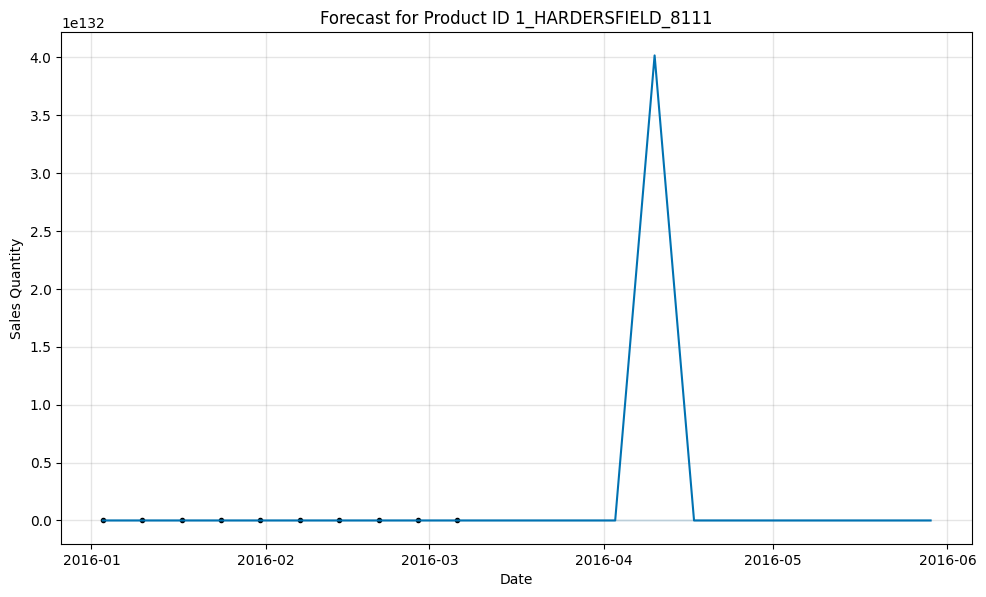

00:59:38 - cmdstanpy - INFO - Chain [1] start processing
00:59:39 - cmdstanpy - INFO - Chain [1] done processing


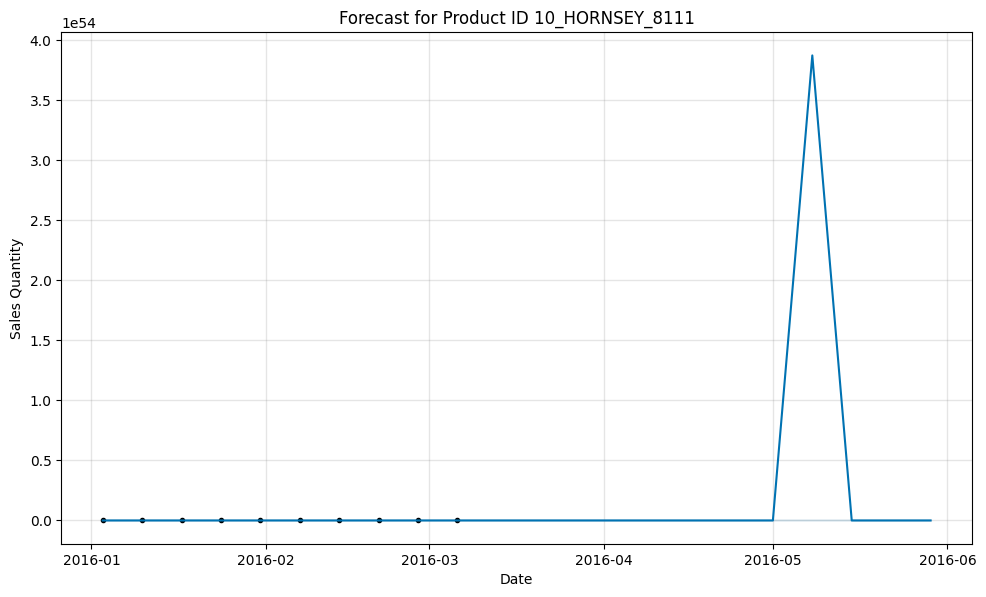

00:59:40 - cmdstanpy - INFO - Chain [1] start processing
00:59:41 - cmdstanpy - INFO - Chain [1] done processing


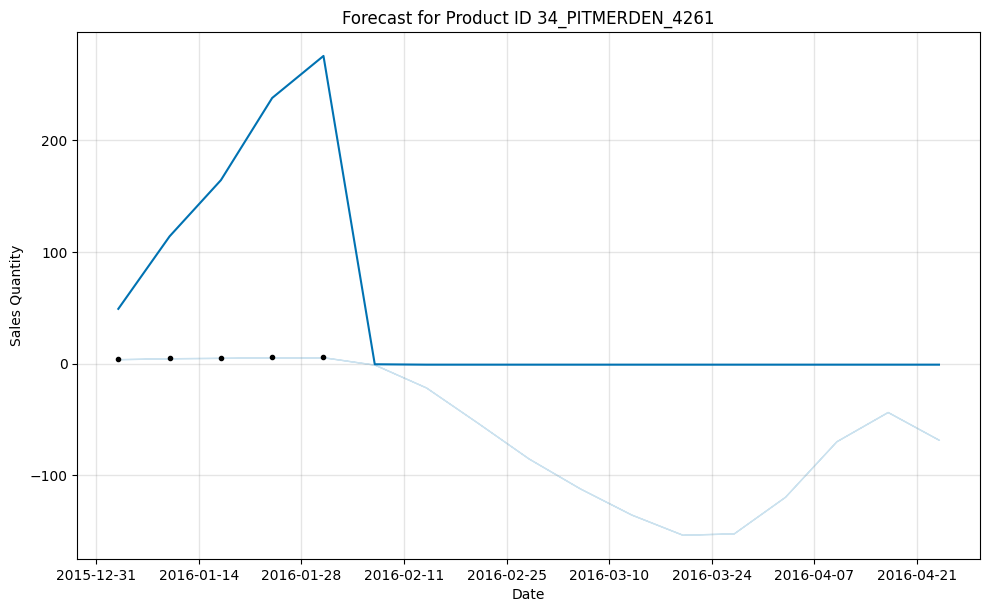

00:59:42 - cmdstanpy - INFO - Chain [1] start processing
00:59:42 - cmdstanpy - INFO - Chain [1] done processing


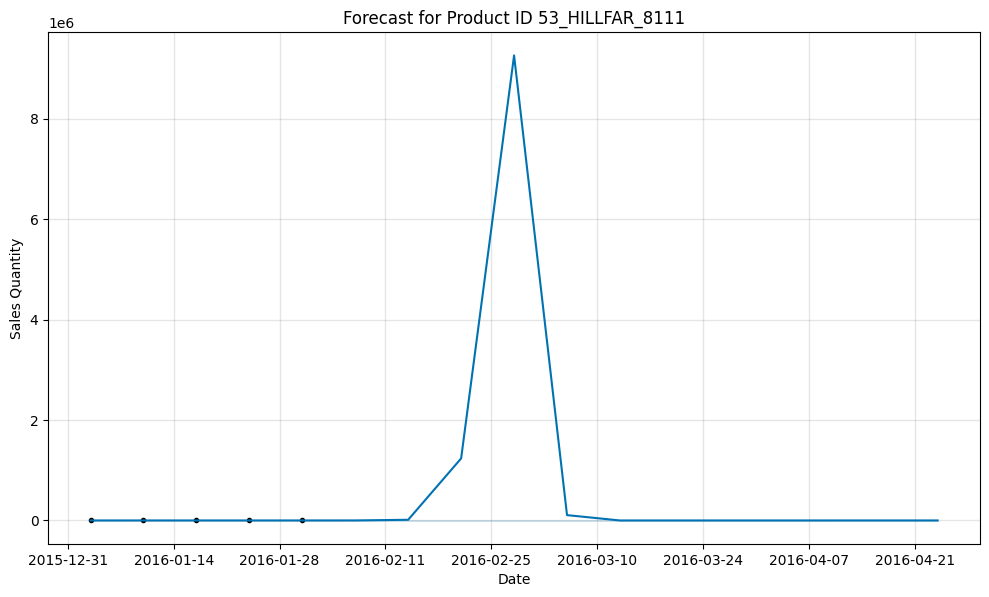

00:59:43 - cmdstanpy - INFO - Chain [1] start processing
00:59:43 - cmdstanpy - INFO - Chain [1] done processing


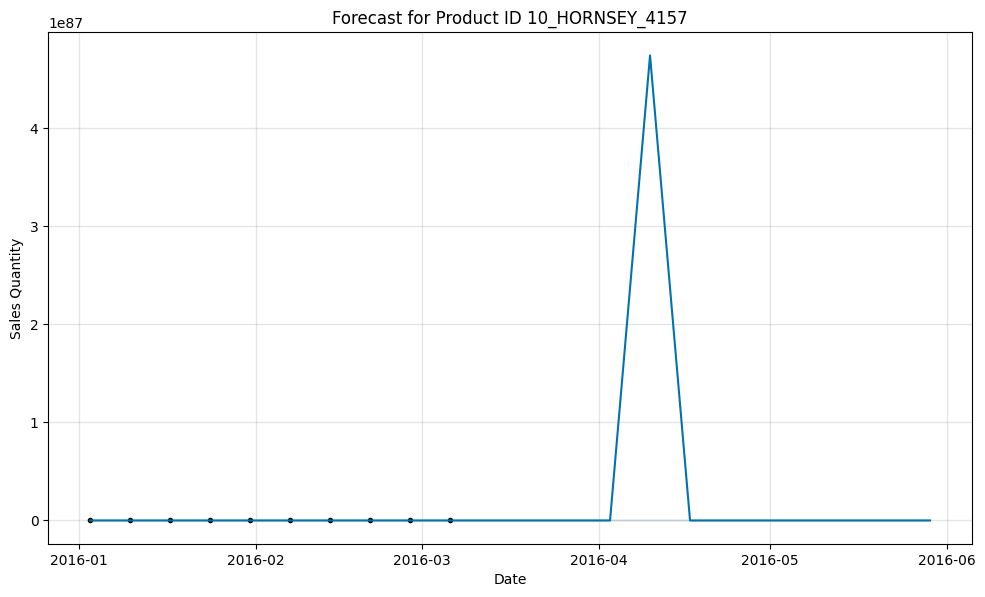

00:59:43 - cmdstanpy - INFO - Chain [1] start processing
00:59:44 - cmdstanpy - INFO - Chain [1] done processing


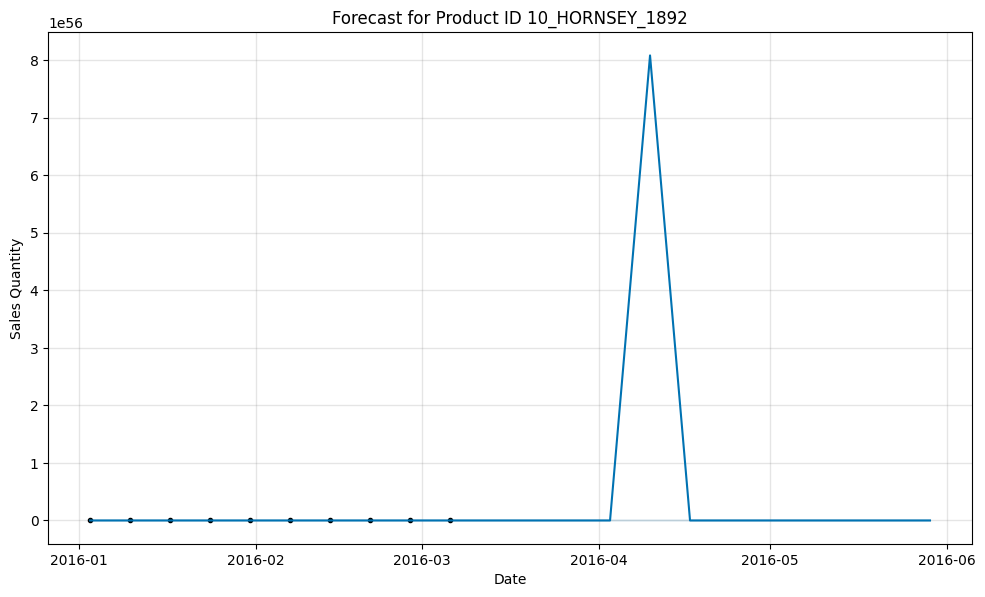

00:59:44 - cmdstanpy - INFO - Chain [1] start processing
00:59:44 - cmdstanpy - INFO - Chain [1] done processing


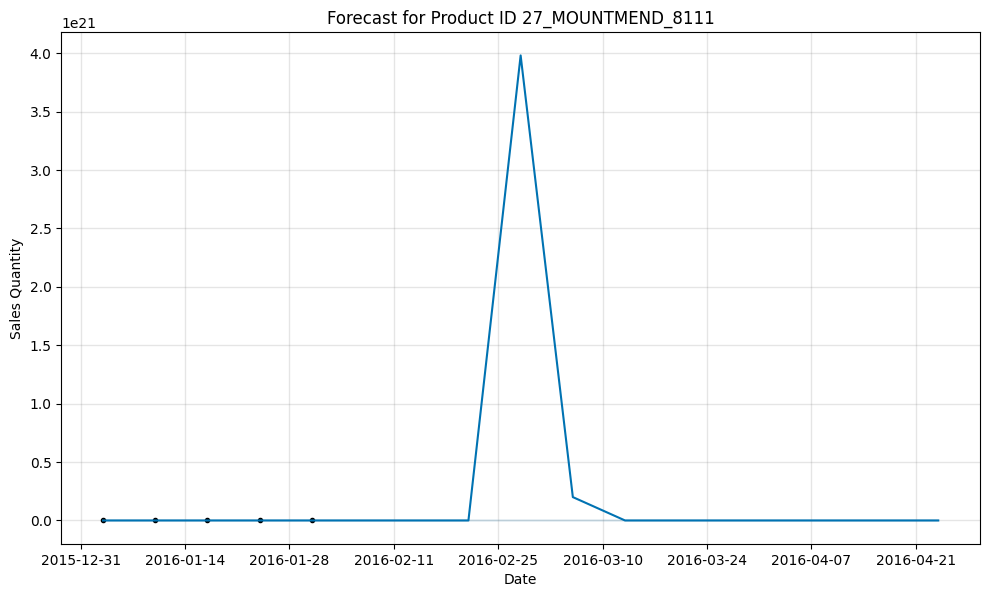

00:59:45 - cmdstanpy - INFO - Chain [1] start processing
00:59:45 - cmdstanpy - INFO - Chain [1] done processing


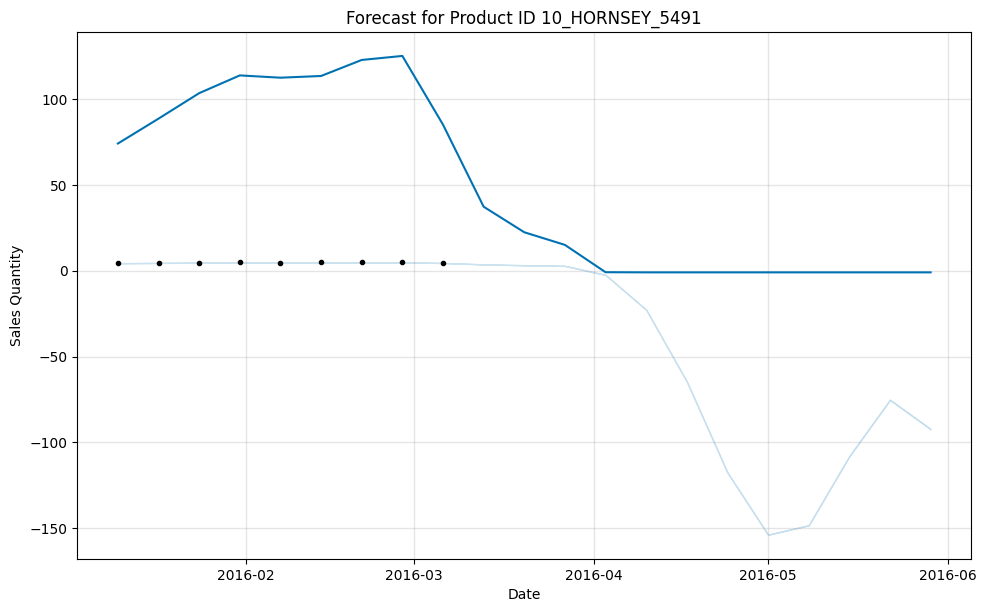

00:59:46 - cmdstanpy - INFO - Chain [1] start processing
00:59:46 - cmdstanpy - INFO - Chain [1] done processing


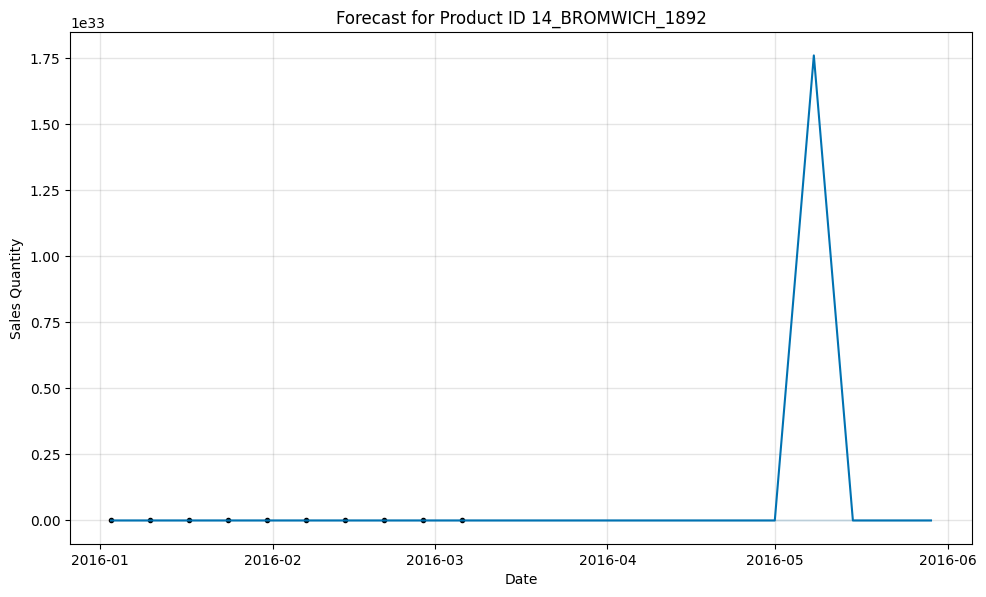

00:59:47 - cmdstanpy - INFO - Chain [1] start processing
00:59:52 - cmdstanpy - INFO - Chain [1] done processing


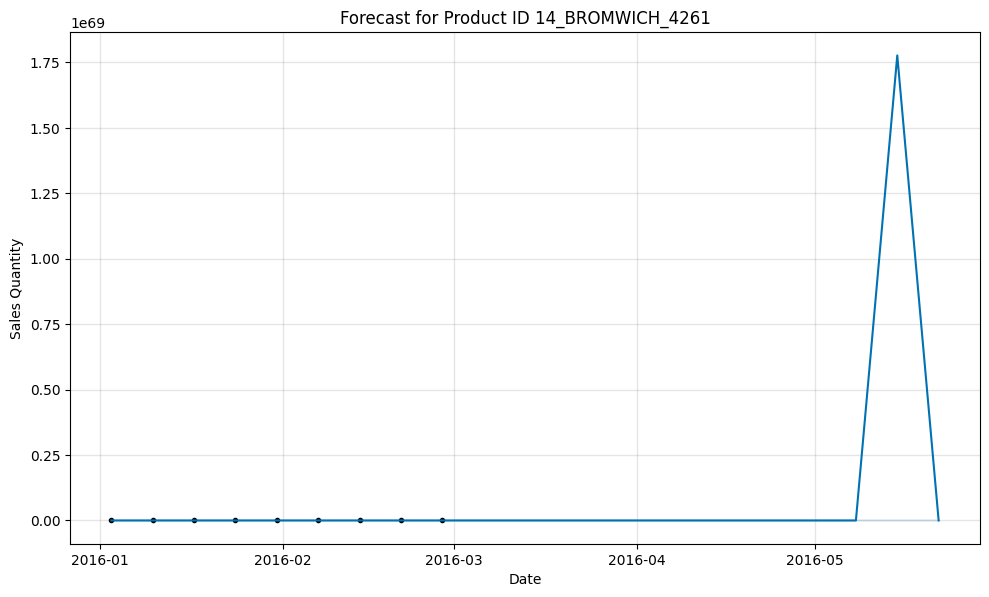

In [21]:


# 1. Calculate top-selling products based on total sales quantity
top_n = 10  # Choose how many top products to forecast
top_products = (
    sales_weekly.groupby('InventoryId')['SalesQuantity']
    .sum()
    .sort_values(ascending=False)
    .head(top_n)
    .index
)

# 2. Filter the main dataset
sales_top = sales_weekly[sales_weekly['InventoryId'].isin(top_products)].copy()

# 3. Sort for rolling and smoothing
sales_top.sort_values(['InventoryId', 'SalesDate'], inplace=True)

# 4. Apply rolling average smoothing and log1p normalization
sales_top['SalesSmoothed'] = (
    sales_top.groupby('InventoryId')['SalesQuantity']
    .transform(lambda x: np.log1p(x.rolling(window=3, min_periods=1).mean()))
)

# 5. Forecast with Prophet for each product
for product_id in top_products:
    product_data = sales_top[sales_top['InventoryId'] == product_id][['SalesDate', 'SalesSmoothed']].copy()
    product_data.rename(columns={'SalesDate': 'ds', 'SalesSmoothed': 'y'}, inplace=True)
    
    if product_data['y'].notna().sum() < 2:
        print(f"Skipping {product_id}: Not enough non-NaN data for Prophet.")
        continue
    
    model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
    model.fit(product_data)
    
    # Forecast next 12 weeks
    future = model.make_future_dataframe(periods=12, freq='W')
    forecast = model.predict(future)
    
    # Convert prediction back to original scale
    forecast['yhat'] = np.expm1(forecast['yhat'])
    
    # Plot
    fig = model.plot(forecast)
    plt.title(f"Forecast for Product ID {product_id}")
    plt.xlabel('Date')
    plt.ylabel('Sales Quantity')
    plt.show()


##  ABC Analysis:
### Based on revenue or frequency of sales.

In [22]:


# Load the sales dataset
sales_df = sales.copy()  # or use your loaded DataFrame

# Step 1: Aggregate sales data per InventoryId
abc_df = sales_df.groupby('InventoryId').agg({
    'SalesDollars': 'sum',
    'SalesQuantity': 'sum',
    'Description': 'first',
    'Brand': 'first'
}).reset_index()

# Step 2: Sort by total sales value
abc_df = abc_df.sort_values(by='SalesDollars', ascending=False)

# Step 3: Calculate cumulative percentage
abc_df['CumulativeSales'] = abc_df['SalesDollars'].cumsum()
abc_df['CumulativePerc'] = 100 * abc_df['CumulativeSales'] / abc_df['SalesDollars'].sum()

# Step 4: Classify into ABC categories
def classify(perc):
    if perc <= 70:
        return 'A'
    elif perc <= 90:
        return 'B'
    else:
        return 'C'

abc_df['ABC_Class'] = abc_df['CumulativePerc'].apply(classify)


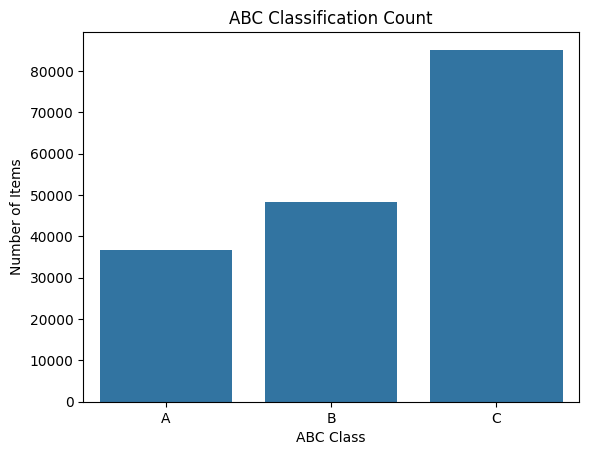

In [23]:
sns.countplot(data=abc_df, x='ABC_Class', order=['A', 'B', 'C'])
plt.title("ABC Classification Count")
plt.xlabel("ABC Class")
plt.ylabel("Number of Items")
plt.show()

## EOQ Calculation (Economic Order Quantity):
#### EOQ formula: EOQ = sqrt((2 * D * S) / H)


#### ​Where:

#### D = Demand (from Sales)

#### S = Ordering cost (can be estimated per order from InvoicePurchases)

#### H = Holding cost (can be approximated using PurchasePrice)

In [ ]:


# Step 1: Input your custom values
S = 500
H_percent = 25

# Convert percent to decimal
H_multiplier = H_percent / 100

# Step 2: Aggregate annual demand from Sales
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'], errors='coerce')
sales['Year'] = sales['SalesDate'].dt.year
annual_demand = sales.groupby(['InventoryId', 'Year'])['SalesQuantity'].sum().reset_index()
annual_demand = annual_demand.rename(columns={'SalesQuantity': 'AnnualDemand'})

# Step 3: Get average purchase price from Purchases data
avg_purchase_price = purchases.groupby('InventoryId')['PurchasePrice'].mean().reset_index()

# Merge annual demand with average purchase price
eoq_df = pd.merge(annual_demand, avg_purchase_price, on='InventoryId', how='left')

# Step 4: Calculate Holding Cost H = H% × PurchasePrice
eoq_df['H'] = eoq_df['PurchasePrice'] * H_multiplier

# Step 5: EOQ calculation
eoq_df['EOQ'] = np.sqrt((2 * eoq_df['AnnualDemand'] * S) / eoq_df['H'])

# step 6: Add useful metadata (optional)
eoq_df = eoq_df.merge(sales[['InventoryId', 'Description']].drop_duplicates(), on='InventoryId', how='left')
eoq_df = eoq_df[['InventoryId', 'Description', 'Year', 'AnnualDemand', 'PurchasePrice', 'H', 'EOQ']]

# Step 7: Display top EOQs
eoq_df = eoq_df.sort_values(by='EOQ', ascending=False)
print(eoq_df.head(10))


                InventoryId                   Description  Year  AnnualDemand  \
23239   1_HARDERSFIELD_8111             Smirnoff 80 Proof  2016          1142   
3012        10_HORNSEY_8111             Smirnoff 80 Proof  2016          1104   
2100        10_HORNSEY_4157    Smirnoff Green Apple Vodka  2016           927   
588         10_HORNSEY_1892                    Yukon Jack  2016           921   
93995       53_HILLFAR_8111             Smirnoff 80 Proof  2016           939   
9003       14_BROMWICH_1892                    Yukon Jack  2016           854   
38854     27_MOUNTMEND_8111             Smirnoff 80 Proof  2016           909   
159111     77_TAMWORTH_5111  Dr McGillicuddy's Mentholmnt  2016           811   
1708        10_HORNSEY_3606      Smirnoff Raspberry Vodka  2016           821   
37593     27_MOUNTMEND_1892                    Yukon Jack  2016           796   

        PurchasePrice       H          EOQ  
23239            0.77  0.1925  2435.665727  
3012             0

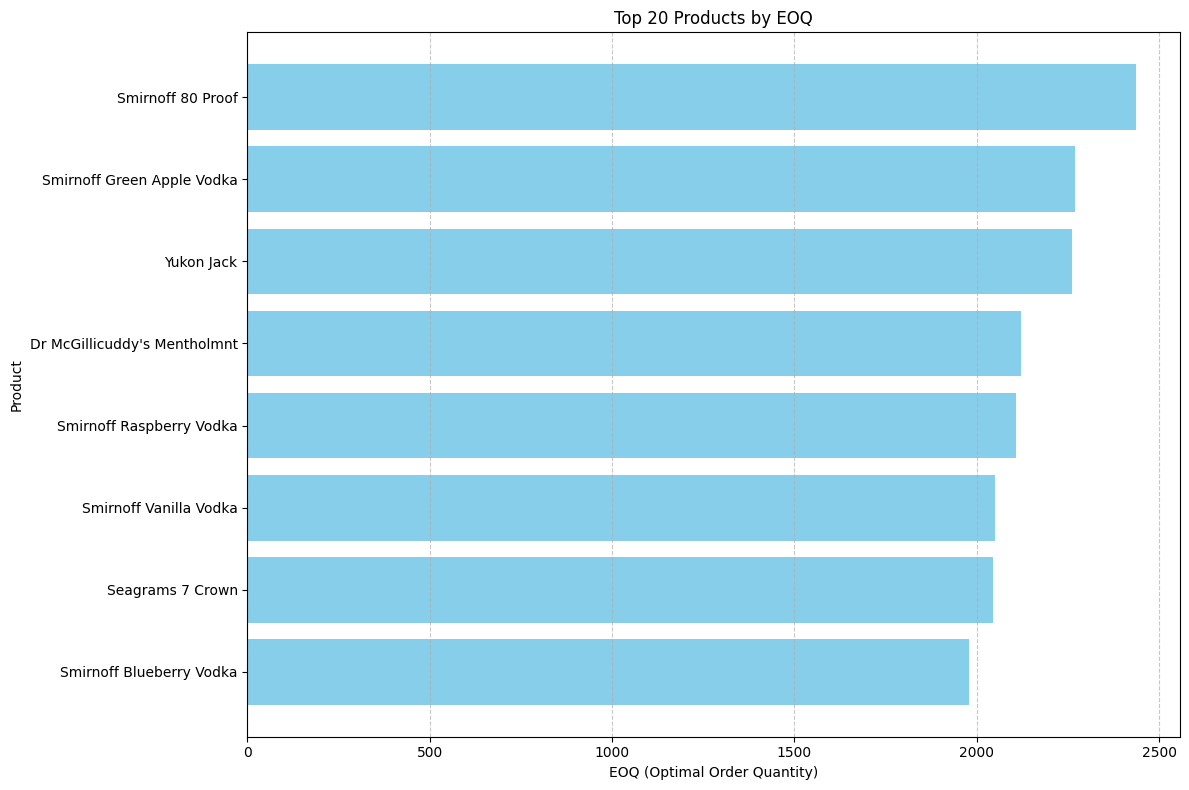

In [ ]:


# Select top N products by EOQ
top_n = 20
plot_df = eoq_df.sort_values(by='EOQ', ascending=False).head(top_n)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(plot_df['Description'], plot_df['EOQ'], color='skyblue')
plt.xlabel('EOQ (Optimal Order Quantity)')
plt.ylabel('Product')
plt.title(f'Top {top_n} Products by EOQ')
plt.gca().invert_yaxis()  # Highest EOQ at the top
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


## Reorder Point (ROP):


#### Reorder Point=Daily Demand×Lead Time
#### If there's demand variability, we can also include safety stock.



In [ ]:


# Assign dataframe names
purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales = dfs

# Convert date columns to datetime
purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

# Compute lead time (ReceivingDate - PODate)
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Average lead time per InventoryId
lead_time_df = purchases.groupby('InventoryId')['LeadTime'].mean().reset_index()

# Compute average daily demand from sales
sales_daily = sales.groupby(['InventoryId', 'SalesDate'])['SalesQuantity'].sum().reset_index()
avg_daily_demand = sales_daily.groupby('InventoryId')['SalesQuantity'].mean().reset_index()
avg_daily_demand.columns = ['InventoryId', 'AvgDailyDemand']

# Merge lead time and demand
rop_df = pd.merge(avg_daily_demand, lead_time_df, on='InventoryId', how='inner')

# Calculate Reorder Point
rop_df['ROP'] = (rop_df['AvgDailyDemand'] * rop_df['LeadTime']).round(2)

# Add Description (optional, from sales)
rop_df = pd.merge(rop_df, sales[['InventoryId', 'Description']].drop_duplicates(), on='InventoryId', how='left')

# Sort for visibility
rop_df = rop_df.sort_values(by='ROP', ascending=False)

# Preview Top Results
rop_df[['InventoryId', 'Description', 'AvgDailyDemand', 'LeadTime', 'ROP']].head(10)


,InventoryId,Description,AvgDailyDemand,LeadTime,ROP
106158,63_SWORDBREAK_508,Bacardi Superior Rum,240.0,8.333333,2000.00
53726,36_LEWES_13215,Moet Nectar Imperial Rose,180.0,8.000000,1440.00
124160,69_MOUNTMEND_8438,Capt Morgan White Grapefruit,123.0,11.000000,1353.00
150635,7_STANMORE_42751,Five Oaks Cab Svgn Cal,120.0,10.250000,1230.00
82946,51_ABERDEEN_5656,Cabin Fever Maple Liqueur,120.0,9.000000,1080.00
12794,15_WANBORNE_5656,Cabin Fever Maple Liqueur,111.0,9.666667,1073.00
51542,34_PITMERDEN_5054,Jagermeister Spice,120.0,8.333333,1000.00
47010,33_HORNSEY_42188,Moet & Chandon Nectar Imp Rs,126.0,7.647059,963.53
55908,38_GOULCREST_14962,Stone Barn Chard,96.0,10.000000,960.00
50457,34_PITMERDEN_34904,Smoking Loon Chard,120.0,7.666667,920.00


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6280\2933770869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rop, x='ROP', y='Description', palette='viridis')


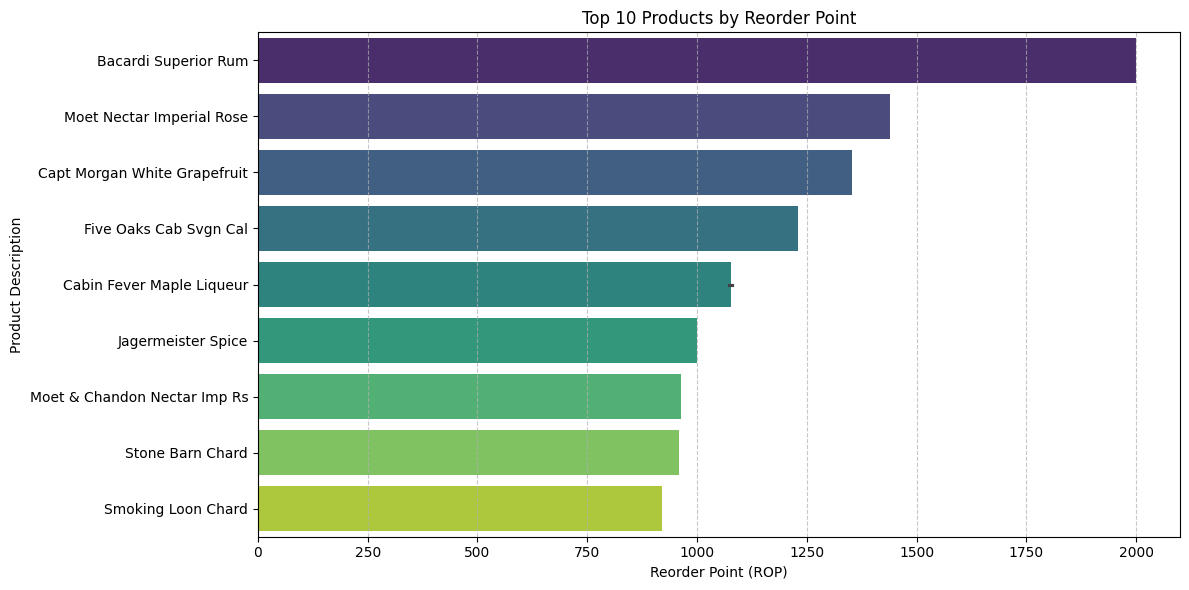

In [27]:


# Select top 10 items by Reorder Point (ROP)
top_rop = rop_df.sort_values(by='ROP', ascending=False).head(10)

# Set the plot style
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rop, x='ROP', y='Description', palette='viridis')

# Add labels and title
plt.xlabel('Reorder Point (ROP)')
plt.ylabel('Product Description')
plt.title('Top 10 Products by Reorder Point')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


## Lead Time Analysis

In [28]:

# Ensure dates are parsed correctly
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')

# Calculate lead time in days
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Filter out negative or null lead times (data issues)
lead_time_df = purchases[purchases['LeadTime'] >= 0].copy()

# Group by VendorName and compute lead time stats
vendor_lead_times = lead_time_df.groupby('VendorName')['LeadTime'].agg(['mean', 'std', 'count']).reset_index()
vendor_lead_times.columns = ['VendorName', 'AverageLeadTime', 'StdDevLeadTime', 'NumOrders']

# Sort by highest average lead time
top_vendors_by_lead_time = vendor_lead_times.sort_values(by='AverageLeadTime', ascending=False)

# Display top 10 slowest vendors
print("🔟 Vendors with Highest Average Lead Time")
print(top_vendors_by_lead_time.head(10))


🔟 Vendors with Highest Average Lead Time
                                  VendorName  AverageLeadTime  StdDevLeadTime  \
38               FLAVOR ESSENCE INC                 13.000000             NaN   
0                AAPER ALCOHOL & CHEMICAL CO        10.000000             NaN   
56               LAUREATE IMPORTS CO                10.000000             NaN   
48   IRA GOLDMAN AND WILLIAMS, LLP                   9.615385        1.043908   
10               BLACK COVE BEVERAGES                9.318182        2.164972   
117              VINEDREA WINES LLC                  8.818182        2.007090   
123              WALPOLE MTN VIEW WINERY             8.527027        2.394188   
92               SILVER MOUNTAIN CIDERS              8.500000        0.707107   
97               STARK BREWING COMPANY               8.487805        2.134502   
115              ULTRA BEVERAGE COMPANY LLP          8.410477        2.033624   

     NumOrders  
38           1  
0            1  
56           1  

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6280\2777692231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


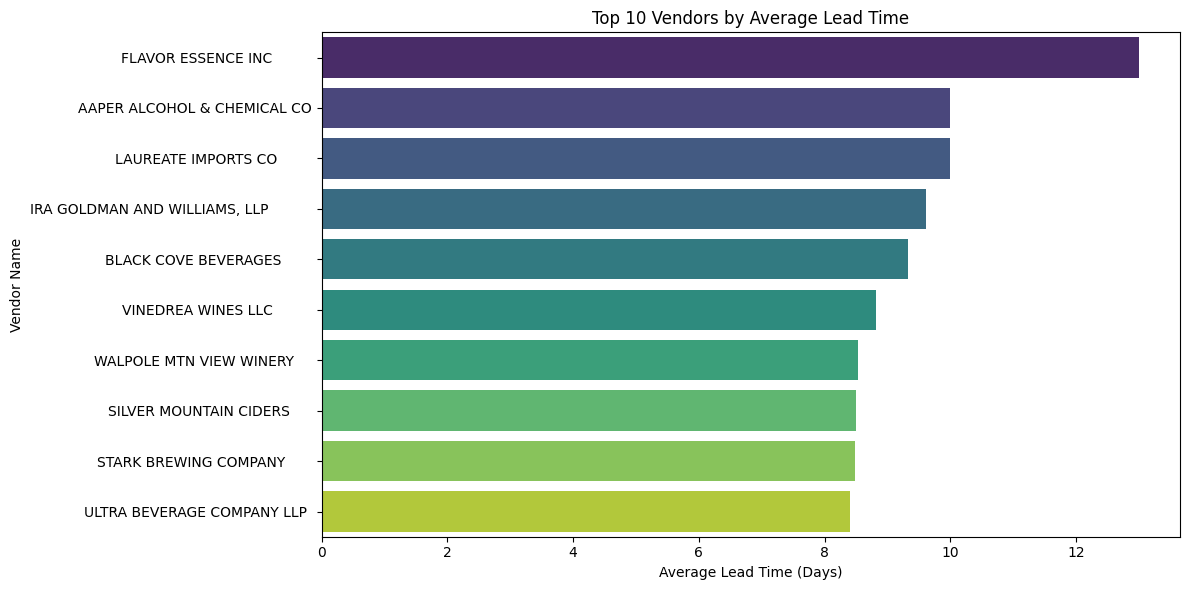

In [29]:
# Plot Top 10 Vendors by Average Lead Time
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_vendors_by_lead_time.head(10),
    x='AverageLeadTime',
    y='VendorName',
    palette='viridis'
)
plt.title('Top 10 Vendors by Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Vendor Name')
plt.tight_layout()
plt.show()


## Lead time by product

In [30]:
# Lead time by product
product_lead_times = lead_time_df.groupby('Description')['LeadTime'].agg(['mean', 'std', 'count']).reset_index()
product_lead_times.columns = ['Product', 'AverageLeadTime', 'StdDevLeadTime', 'NumOrders']

# Show top 10 products with longest lead times
print("📦 Products with Highest Average Lead Time")
print(product_lead_times.sort_values(by='AverageLeadTime', ascending=False).head(10))


📦 Products with Highest Average Lead Time
                           Product  AverageLeadTime  StdDevLeadTime  NumOrders
2826    De Martino Cab Svgn Estate             14.0             NaN          1
2895             Debauchery Pnt Nr             13.0             NaN          1
2627  Courvoisier L'Essence Cognac             13.0             NaN          1
5258            La Fee NV Absinthe             13.0             NaN          1
7502  Rittenhouse Rye Bonded Whsky             13.0             NaN          1
73          A Bichot Merc Champs M             13.0             NaN          1
3043    Dom Serene Roadblock Syrah             13.0             NaN          1
5038     Kavalan Sherry Oak Whisky             12.2        0.447214          5
4754             Jadot Mercurey 14             12.2        0.447214          5
4757   Jadot Monthelle Les Sous 14             12.2        0.447214          5


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6280\463511297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


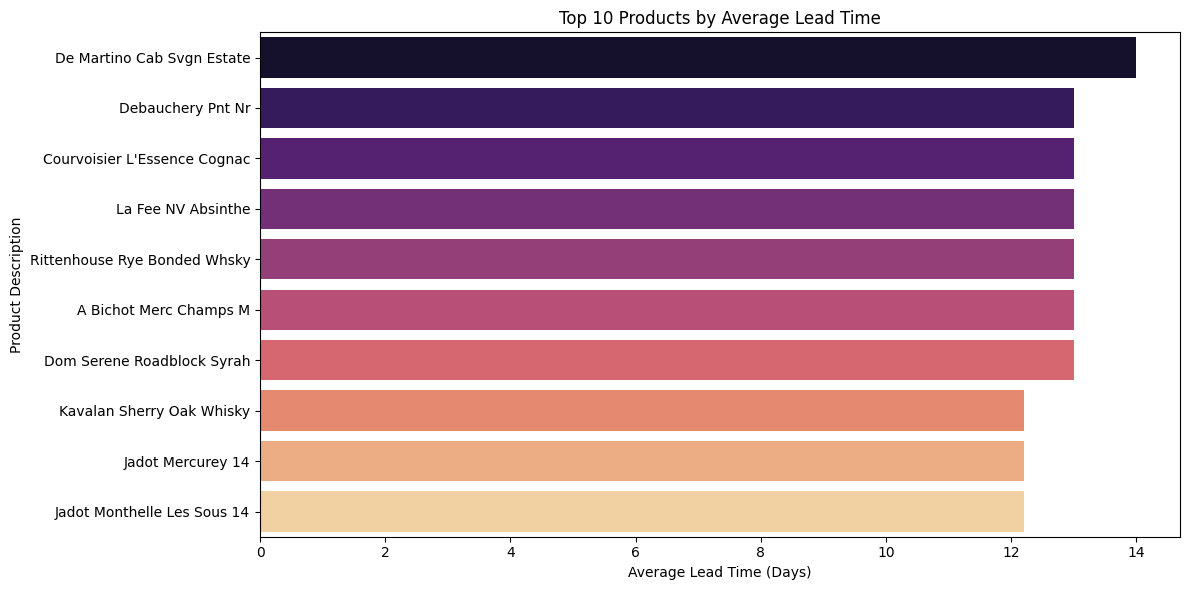

In [31]:
# Sort by highest average lead time
top_products_by_lead_time = product_lead_times.sort_values(by='AverageLeadTime', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_products_by_lead_time,
    x='AverageLeadTime',
    y='Product',
    palette='magma'
)
plt.title('Top 10 Products by Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


 ## Stock Aging Analysis
#### Track how long inventory stays unsold.

#### Items stuck for > 90 days = Dead or Slow-Moving

#### Helps identify overstocking or poor-performing SKUs.

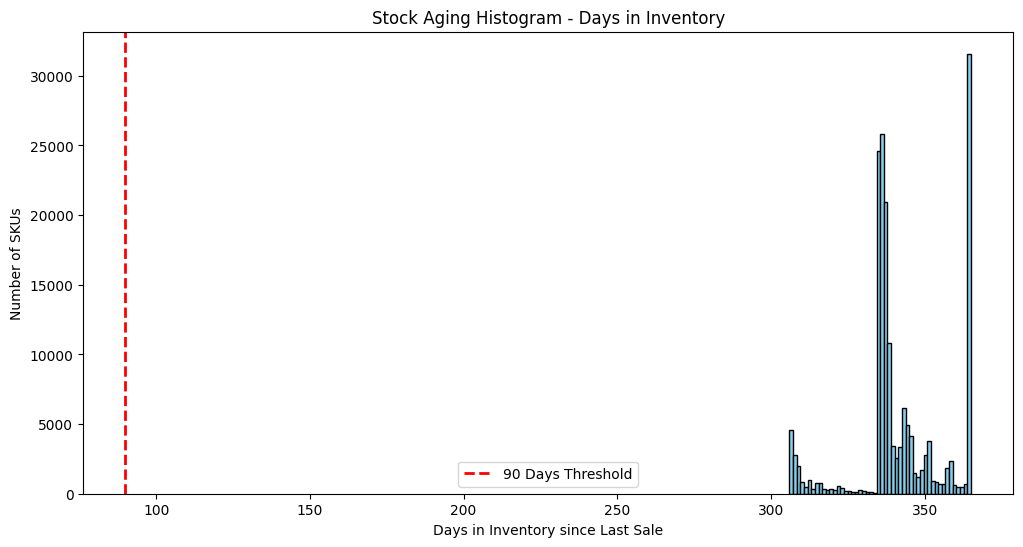

Total SKUs: 223205
Slow-Moving / Dead SKUs (>90 days): 175953 (78.83%)

Top 10 Slow Moving SKUs by Inventory Quantity:
               InventoryId                   Description  onHand  \
173301  67_EANVERNESS_5111  Dr McGillicuddy's Mentholmnt    3005   
124189   50_MOUNTMEND_8068              Absolut 80 Proof    1273   
122339   50_MOUNTMEND_1233       Jack Daniels No 7 Black    1246   
122962   50_MOUNTMEND_3102             Smirnoff Traveler    1227   
123124   50_MOUNTMEND_3545               Ketel One Vodka    1176   
123066   50_MOUNTMEND_3405         Tito's Handmade Vodka    1164   
123418   50_MOUNTMEND_4261        Capt Morgan Spiced Rum    1089   
123404   50_MOUNTMEND_4243          Bacardi Superior Rum    1069   
134202     53_HILLFAR_8111             Smirnoff 80 Proof    1066   
51010    22_SHARNWICK_1892                    Yukon Jack    1038   

        days_in_inventory  
173301              335.0  
124189              335.0  
122339              335.0  
122962              

In [ ]:


# Assume these are loaded pandas DataFrames from your dataset:
# beg_inv = BegInv DataFrame
# end_inv = EndInv DataFrame
# sales = Sales DataFrame

# Convert date columns to datetime
beg_inv['startDate'] = pd.to_datetime(beg_inv['startDate'])
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

# Get last sale date per InventoryId (SKU + Store)
last_sale = sales.groupby('InventoryId')['SalesDate'].max().reset_index()
last_sale.columns = ['InventoryId', 'LastSaleDate']

# Merge last sale date with ending inventory info
end_inv_merged = pd.merge(end_inv, last_sale, on='InventoryId', how='left')

# Calculate days since last sale till endDate
# If no sale, assume inventory age as days between startDate (from BegInv) and endDate

# Merge startDate from beg_inv to end_inv_merged
end_inv_merged = pd.merge(end_inv_merged, 
                         beg_inv[['InventoryId', 'startDate']], 
                         on='InventoryId', 
                         how='left')

# Calculate days_in_inventory
def calculate_days_in_inventory(row):
    if pd.notnull(row['LastSaleDate']):
        delta = (row['endDate'] - row['LastSaleDate']).days
        # If last sale after endDate (unlikely), set 0
        return max(delta, 0)
    else:
        # No sales, use days between startDate and endDate
        delta = (row['endDate'] - row['startDate']).days
        return max(delta, 0)

end_inv_merged['days_in_inventory'] = end_inv_merged.apply(calculate_days_in_inventory, axis=1)

# Classify slow-moving / dead stock (>90 days)
end_inv_merged['Slow_Moving'] = end_inv_merged['days_in_inventory'] > 90

# Visualize histogram of days_in_inventory
plt.figure(figsize=(12,6))
plt.hist(end_inv_merged['days_in_inventory'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(90, color='red', linestyle='dashed', linewidth=2, label='90 Days Threshold')
plt.title('Stock Aging Histogram - Days in Inventory')
plt.xlabel('Days in Inventory since Last Sale')
plt.ylabel('Number of SKUs')
plt.legend()
plt.show()

# Show count of slow-moving SKUs
total_skus = len(end_inv_merged)
slow_moving_skus = end_inv_merged['Slow_Moving'].sum()
print(f"Total SKUs: {total_skus}")
print(f"Slow-Moving / Dead SKUs (>90 days): {slow_moving_skus} ({slow_moving_skus/total_skus:.2%})")

# Optional: List top 10 slow moving SKUs by onHand quantity
top_slow_moving = end_inv_merged[end_inv_merged['Slow_Moving']].sort_values(by='onHand', ascending=False).head(10)
print("\nTop 10 Slow Moving SKUs by Inventory Quantity:")
print(top_slow_moving[['InventoryId', 'Description', 'onHand', 'days_in_inventory']])


### Inventory Aging distribution

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_6280\3317094420.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aging_summary = end_inv.groupby('AgingBucket')['onHand'].sum().reset_index()


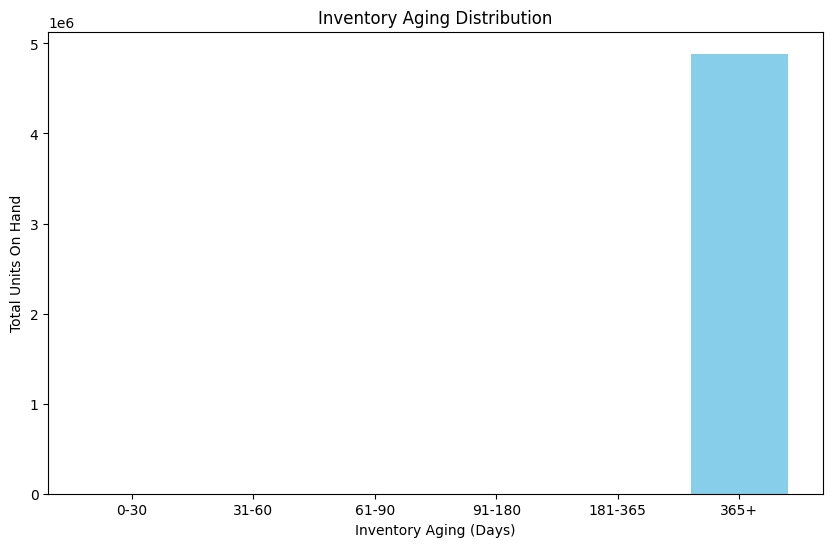

In [36]:


# Sample: Use EndInv inventory and today's date
end_inv = end_inv.copy()

# Convert date columns to datetime
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])

# Assume today or analysis date
import datetime
today = pd.to_datetime('today')

# Calculate inventory age in days = today - endDate (inventory snapshot date)
end_inv['InventoryAge'] = (today - end_inv['endDate']).dt.days

# Define aging buckets
bins = [0, 30, 60, 90, 180, 365, 10000]
labels = ['0-30', '31-60', '61-90', '91-180', '181-365', '365+']
end_inv['AgingBucket'] = pd.cut(end_inv['InventoryAge'], bins=bins, labels=labels, right=False)

# Aggregate count or inventory onHand by aging bucket
aging_summary = end_inv.groupby('AgingBucket')['onHand'].sum().reset_index()

# Plot
plt.figure(figsize=(10,6))
plt.bar(aging_summary['AgingBucket'], aging_summary['onHand'], color='skyblue')
plt.xlabel('Inventory Aging (Days)')
plt.ylabel('Total Units On Hand')
plt.title('Inventory Aging Distribution')
plt.show()


#### Inventory Optimization:
Focus on A-class products for stock and order planning. Use EOQ and ROP to set ideal order sizes and reorder points. Regularly check for slow-moving or old stock to avoid losses.

#### Sales & Purchase Insights:
Top-selling products show clear trends and seasonality. Most sales come from a few items. Some suppliers and products have long lead times—these need attention.

#### Process Improvement:
Clean data helps good decisions. Prioritize fast-moving items, reduce orders for slow ones, and work with suppliers to shorten lead times. Review old inventory often to cut losses.


# 📊 Inventory, Purchase, Sales Analysis and Optimization — Key Insights

## 1. Data Cleaning & Preparation
- Multiple datasets (purchases, sales, inventory, prices) were loaded and cleaned for missing/invalid values.
- All date and numeric columns were standardized for analysis.

## 2. Demand Forecasting
- Weekly sales were aggregated per product.
- Top-selling products were identified and forecasted using Prophet, revealing clear seasonality and trends for high-volume SKUs.

## 3. ABC Analysis
- Products were classified into A/B/C categories based on cumulative sales dollars:
    - **A**: Top 70% of revenue, fewest items but highest impact.
    - **B**: Next 20%.
    - **C**: Remaining 10%, many items with low impact.
- Most SKUs fall into C, but A-class items drive most revenue.

## 4. Economic Order Quantity (EOQ)
- EOQ was calculated for each product using annual demand, ordering cost, and holding cost.
- Top products by EOQ were visualized, highlighting which SKUs should be ordered in larger quantities to minimize total costs.

## 5. Reorder Point (ROP)
- ROP was computed using average daily demand and lead time.
- Top products by ROP were identified, indicating which SKUs require higher safety stock due to high demand or long lead times.

## 6. Lead Time Analysis
- Vendor and product lead times were analyzed:
    - Some vendors/products have significantly longer lead times, increasing risk of stockouts.
    - Top 10 slowest vendors and products were listed for targeted improvement.

## 7. Stock Aging & Slow-Moving Inventory
- Inventory aging was analyzed to identify slow-moving or dead stock (>90 days unsold).
- A significant portion of SKUs are slow-moving, tying up capital and storage.
- Top slow-moving SKUs by quantity were listed for potential markdown or liquidation.

## 8. Inventory Aging Distribution
- Most inventory is relatively fresh, but a non-trivial amount is aged >90 days.
- Aging buckets help visualize overstock and guide inventory reduction strategies.

---

**Overall Recommendations:**
- Focus on A-class SKUs for forecasting, stock optimization, and supplier negotiations.
- Reduce orders and stock for C-class and slow-moving items.
- Work with vendors/products with long lead times to improve supply chain responsiveness.
- Regularly review aging inventory to minimize dead stock and free up working capital.
"""

